# Семинар 3: EDA и sklearn

На семинаре мы будем заниматься построением различных визуализаций. Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности, а затем научиться оценивать  модели на (пока что частично) обработанных данных.

Мы продолжим работать с данными о пассажирах Титаника.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Загрузим данные.

In [2]:
Data = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

**Задание 1.** Выведите на экран размеры таблицы

In [3]:
Data.shape

(891, 12)

## Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [4]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [6]:
Data.Sex.value_counts(dropna=False)

male       574
female     312
unknown      5
Name: Sex, dtype: int64

**Задание ***. Подумайте, можно ли как-то узнать пол пассажиров, которые отнесены к категории unknown?

In [7]:
Data.query('Sex == "unknown"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,Moran; Mr. James,unknown,NaN,0,0,330877,8.4583,NaN,Q
13,14,0,3,Andersson; Mr. Anders Johan,unknown,39.00,1,5,347082,31.2750,NaN,S
28,29,1,3,"O'Dwyer; Miss. Ellen ""Nellie""",unknown,NaN,0,0,330959,7.8792,NaN,Q
49,50,0,3,Arnold-Franchi; Mrs. Josef (Josefine Franchi),unknown,18.00,1,0,349237,17.8000,NaN,S
78,79,1,2,Caldwell; Master. Alden Gates,unknown,0.83,0,2,248738,29.0000,NaN,S


In [8]:
Data.loc[5, 'Sex'] = 'male'
Data.loc[13, 'Sex'] = 'male'
Data.loc[28, 'Sex'] = 'female'
Data.loc[49, 'Sex'] = 'female'
Data.loc[78, 'Sex'] = 'male'

**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [9]:
Data.drop(Data[Data.Sex == 'unknown'].index, inplace=True)

In [10]:
Data.query('Sex != "unknown"').shape

(891, 12)

Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [11]:
Data.loc[Data[Data.Sex == 'male'].index, 'Sex'] = 1
Data.loc[Data[Data.Sex == 'female'].index, 'Sex'] = 0
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,S


Посмотрим, как влияет пол на выживаемость.

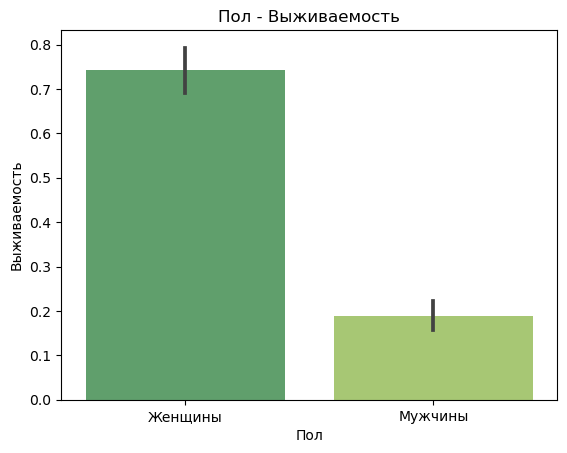

In [12]:
graph = sns.barplot(x='Sex', y='Survived', data=Data, palette='summer')
graph.set_xticklabels(['Женщины', 'Мужчины'])
graph.set_xlabel("Пол")
graph.set_ylabel("Выживаемость")
plt.title('Пол - Выживаемость')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

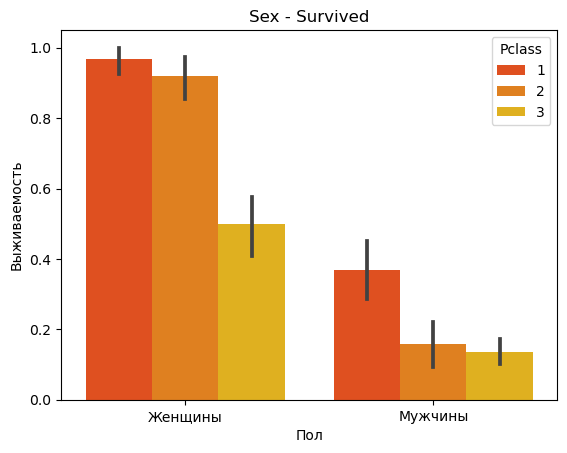

In [13]:
graph = sns.barplot(x='Sex', y='Survived', hue='Pclass', data=Data, palette='autumn')
graph.set_xticklabels(['Женщины', 'Мужчины'])
graph.set_xlabel("Пол")
graph.set_ylabel("Выживаемость")
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

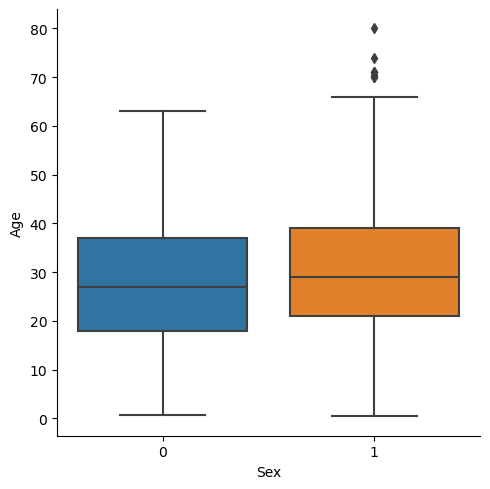

In [14]:
sns.catplot(x="Sex", y="Age", data=Data, kind="box") # box plot (box-and-whiskers-plot)
plt.show()

Можно детализировать картинку, добавив разделение по Pclass.

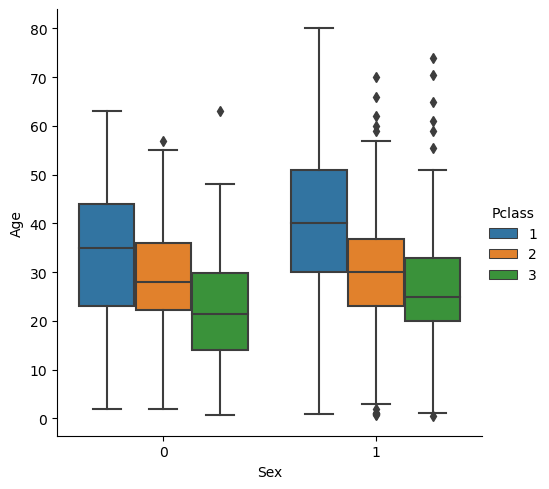

In [15]:
sns.catplot(x="Sex", y="Age",hue ="Pclass", data=Data, kind="box")
plt.show()

**Обработаем признак 'Embarked'**

In [17]:
print(Data['Embarked'].value_counts(dropna=False))
Data.shape

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


(891, 12)

**Задание 6.** Удалим из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [18]:
Data.dropna(subset=['Embarked'], inplace=True)
Data.shape

(889, 12)

**Задание 7.** Закодируем столбец Embarked с помощью OneHot-кодирования (pd.get_dummies). 

In [19]:
Data = pd.get_dummies(Data, columns=['Embarked'], drop_first=True)
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,1


**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [20]:
Data[Data.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
5,6,0,3,Moran; Mr. James,1,NaN,0,0,330877,8.4583,NaN,1,0
17,18,1,2,Williams; Mr. Charles Eugene,1,NaN,0,0,244373,13.0000,NaN,0,1
19,20,1,3,Masselmani; Mrs. Fatima,0,NaN,0,0,2649,7.2250,NaN,0,0
26,27,0,3,Emir; Mr. Farred Chehab,1,NaN,0,0,2631,7.2250,NaN,0,0
28,29,1,3,"O'Dwyer; Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,Razi; Mr. Raihed,1,NaN,0,0,2629,7.2292,NaN,0,0
863,864,0,3,"Sage; Miss. Dorothy Edith ""Dolly""",0,NaN,8,2,CA. 2343,69.5500,NaN,0,1
868,869,0,3,van Melkebeke; Mr. Philemon,1,NaN,0,0,345777,9.5000,NaN,0,1
878,879,0,3,Laleff; Mr. Kristo,1,NaN,0,0,349217,7.8958,NaN,0,1


Заполним пропуски медианным значением Age.

In [21]:
median_age = Data['Age'].median()

Data['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

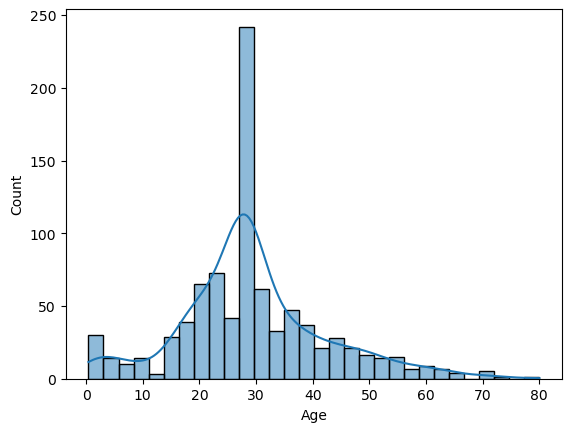

In [22]:
sns.histplot(Data['Age'], kde=True)
plt.show()

**Обработаем признак 'Fare'**

1) Проверьте, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполните их медианным значением Fare

In [23]:
Data.Fare.isna().sum()

0

**Обработаем признак 'Pclass'**

Есть ли в Pclass пропущенные значения?

In [24]:
Data['Pclass'].value_counts(dropna=False)

3    491
1    214
2    184
Name: Pclass, dtype: int64

**Задание 8.** Нарисуйте столбчатую диаграмму выживаемости в зависимости от Pclass.

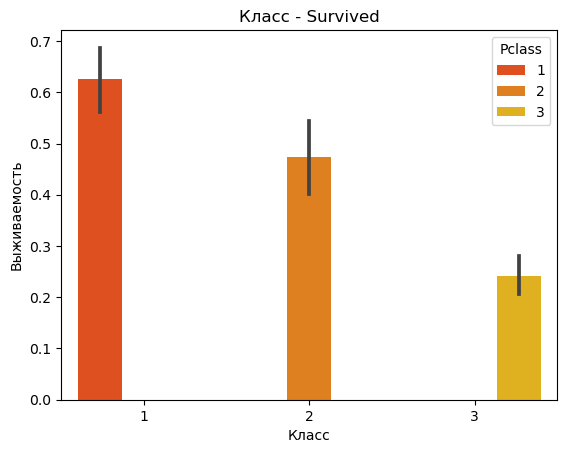

In [25]:
graph = sns.barplot(x='Pclass', y='Survived', hue='Pclass', data=Data, palette='autumn')
graph.set_xlabel("Класс")
graph.set_ylabel("Выживаемость")
plt.title('Класс - Survived')
plt.show()

**Обработаем признак 'SibSp' (число братьев или сестер, мужей, жен)**

Есть ли в SibSp пропущенные значения?

In [27]:
Data['SibSp'].value_counts(dropna=False)

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

**Обработаем признак 'Parch' (число родителей/детей)**

Есть ли в Parch пропущенные значения?

In [28]:
Data['Parch'].value_counts(dropna=False)

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

**Задание 9.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [29]:
Data = Data.set_index('PassengerId')

In [30]:
Data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,Braund; Mr. Owen Harris,1,22.0,1,0,A/5 21171,7.2500,NaN,0,1
2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,0,38.0,1,0,PC 17599,71.2833,C85,0,0
3,1,3,Heikkinen; Miss. Laina,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),0,35.0,1,0,113803,53.1000,C123,0,1
5,0,3,Allen; Mr. William Henry,1,35.0,0,0,373450,8.0500,NaN,0,1


# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

**Задание 10.** Создайте таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [33]:
#your code here
NumericData = Data._get_numeric_data()
NumericData

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
PassengerId,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1
2,1,1,38.0,1,0,71.2833,0,0
3,1,3,26.0,0,0,7.9250,0,1
4,1,1,35.0,1,0,53.1000,0,1
5,0,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,0,1
888,1,1,19.0,0,0,30.0000,0,1
889,0,3,28.0,1,2,23.4500,0,1


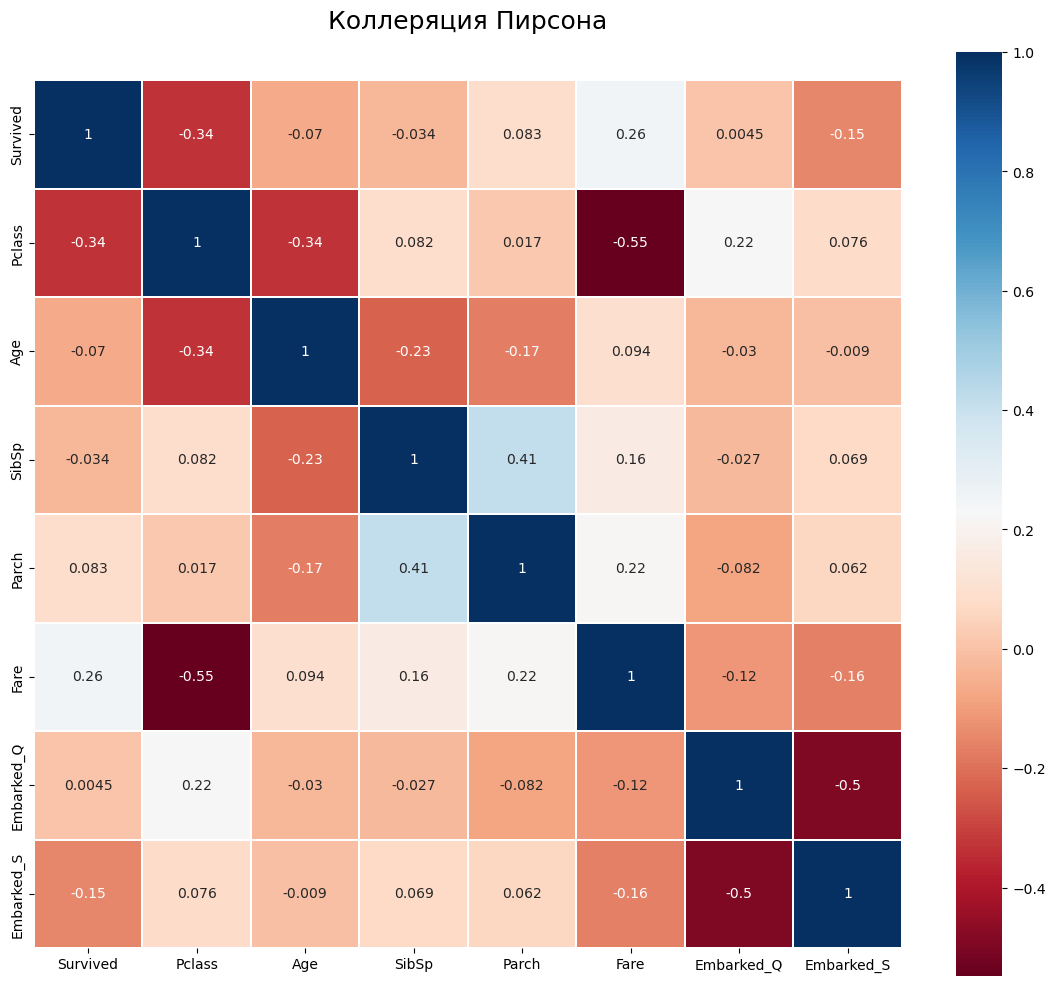

In [35]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Коллеряция Пирсона', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

Посмотрим на попарные зависимости некоторых признаков.

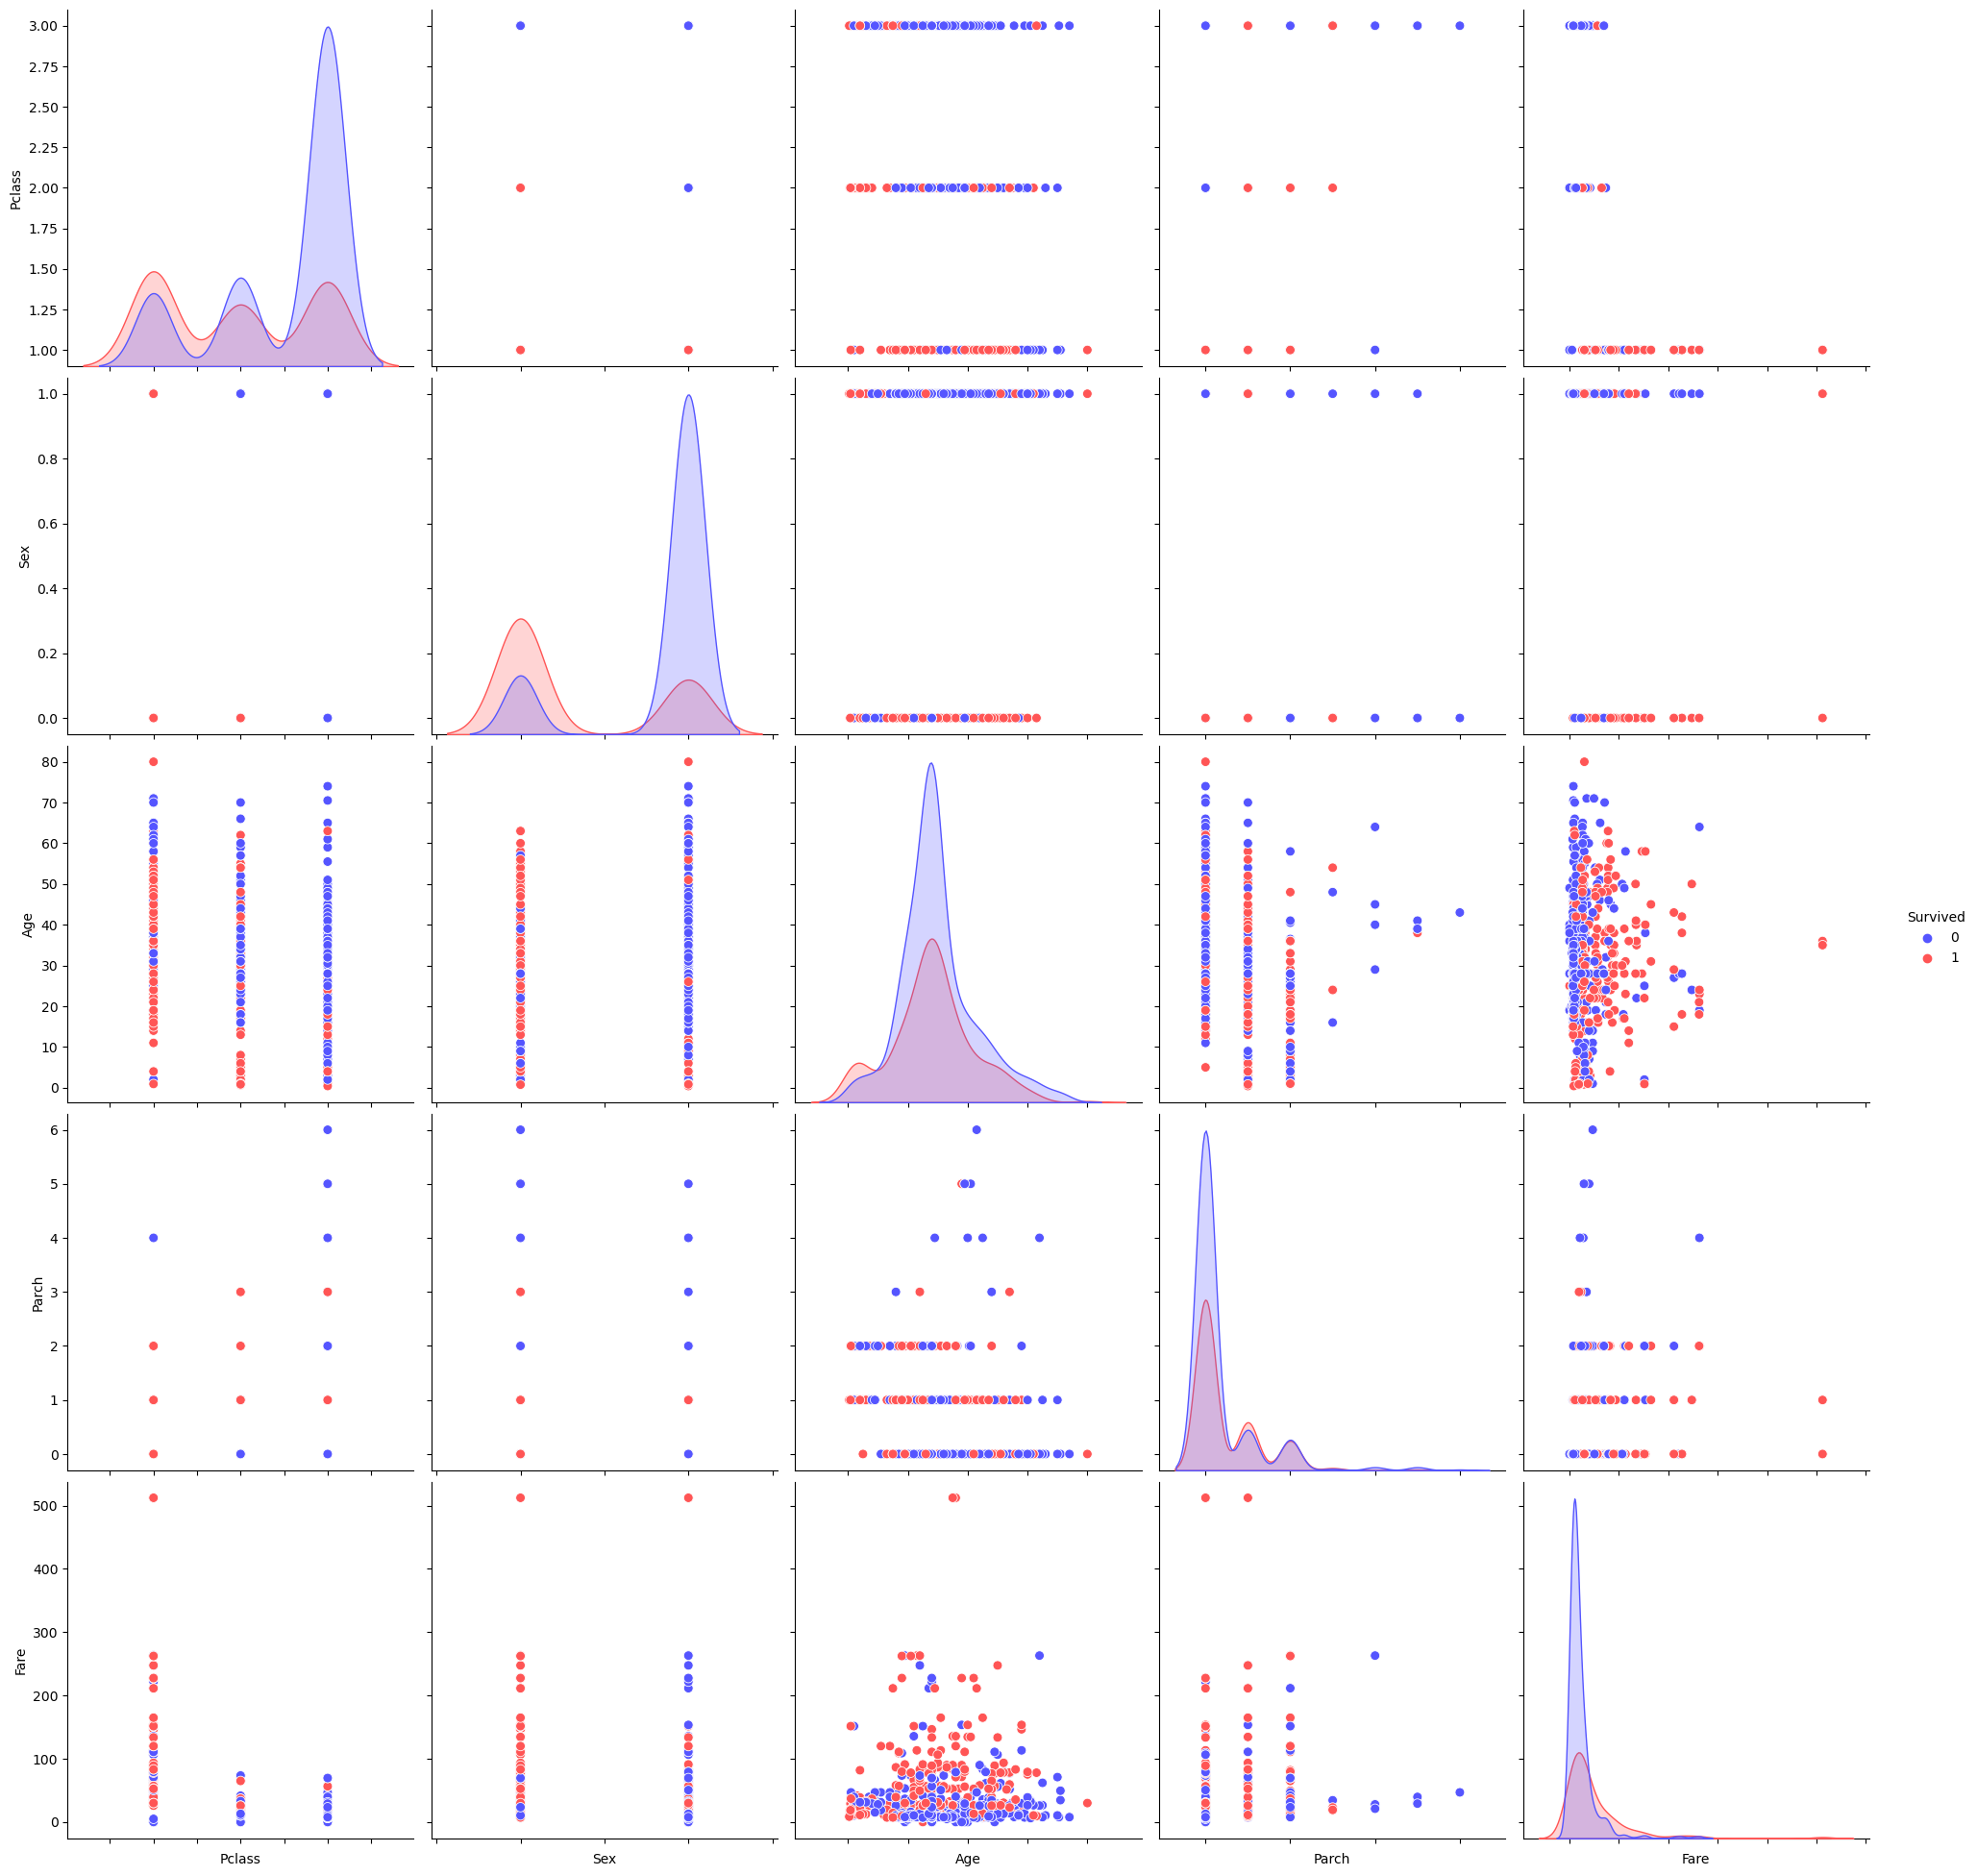

In [38]:
g = sns.pairplot(Data[['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare']], \
                 hue='Survived', palette = 'seismic', height=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])
plt.show()

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [40]:
Data['AgeBin'] = pd.cut(Data['Age'].astype(int), 5)

Data['AgeBin'].head()

PassengerId
1    (16.0, 32.0]
2    (32.0, 48.0]
3    (16.0, 32.0]
4    (32.0, 48.0]
5    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] < (48.0, 64.0] < (64.0, 80.0]]

Теперь переведём полученные интервалы в числа, используя LabelEncoder.

In [41]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

Data['AgeBin_Code'] = label.fit_transform(Data['AgeBin'])

Data[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
PassengerId,,,
1,22.0,"(16.0, 32.0]",1
2,38.0,"(32.0, 48.0]",2
3,26.0,"(16.0, 32.0]",1
4,35.0,"(32.0, 48.0]",2
5,35.0,"(32.0, 48.0]",2


**Задание 11.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [43]:
Data["BinFare"] = pd.cut(Data["Fare"].astype(int), 4)
Data.BinFare.value_counts()

(-0.512, 128.0]    851
(128.0, 256.0]      29
(256.0, 384.0]       6
(384.0, 512.0]       3
Name: BinFare, dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
Data["BinFareCode"] = label.fit_transform(Data["BinFare"])
Data[["Fare", "BinFare", "BinFareCode"]].head()

,Fare,BinFare,BinFareCode
PassengerId,,,
1,7.2500,"(-0.512, 128.0]",0
2,71.2833,"(-0.512, 128.0]",0
3,7.9250,"(-0.512, 128.0]",0
4,53.1000,"(-0.512, 128.0]",0
5,8.0500,"(-0.512, 128.0]",0


Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 12.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

<AxesSubplot:xlabel='NameLen', ylabel='Count'>

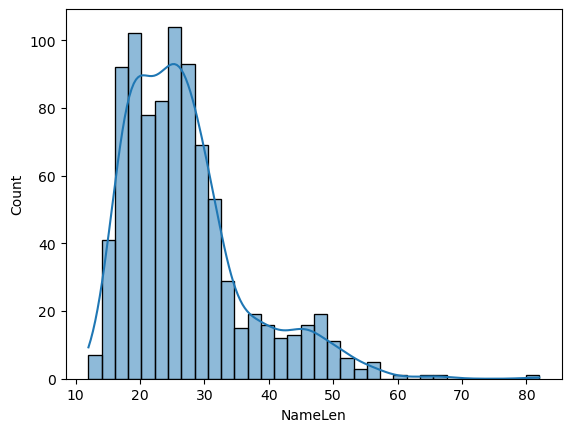

In [47]:
Data["NameLen"] = Data.Name.apply(len)
sns.histplot(Data["NameLen"], kde=True)

**Задание 13.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

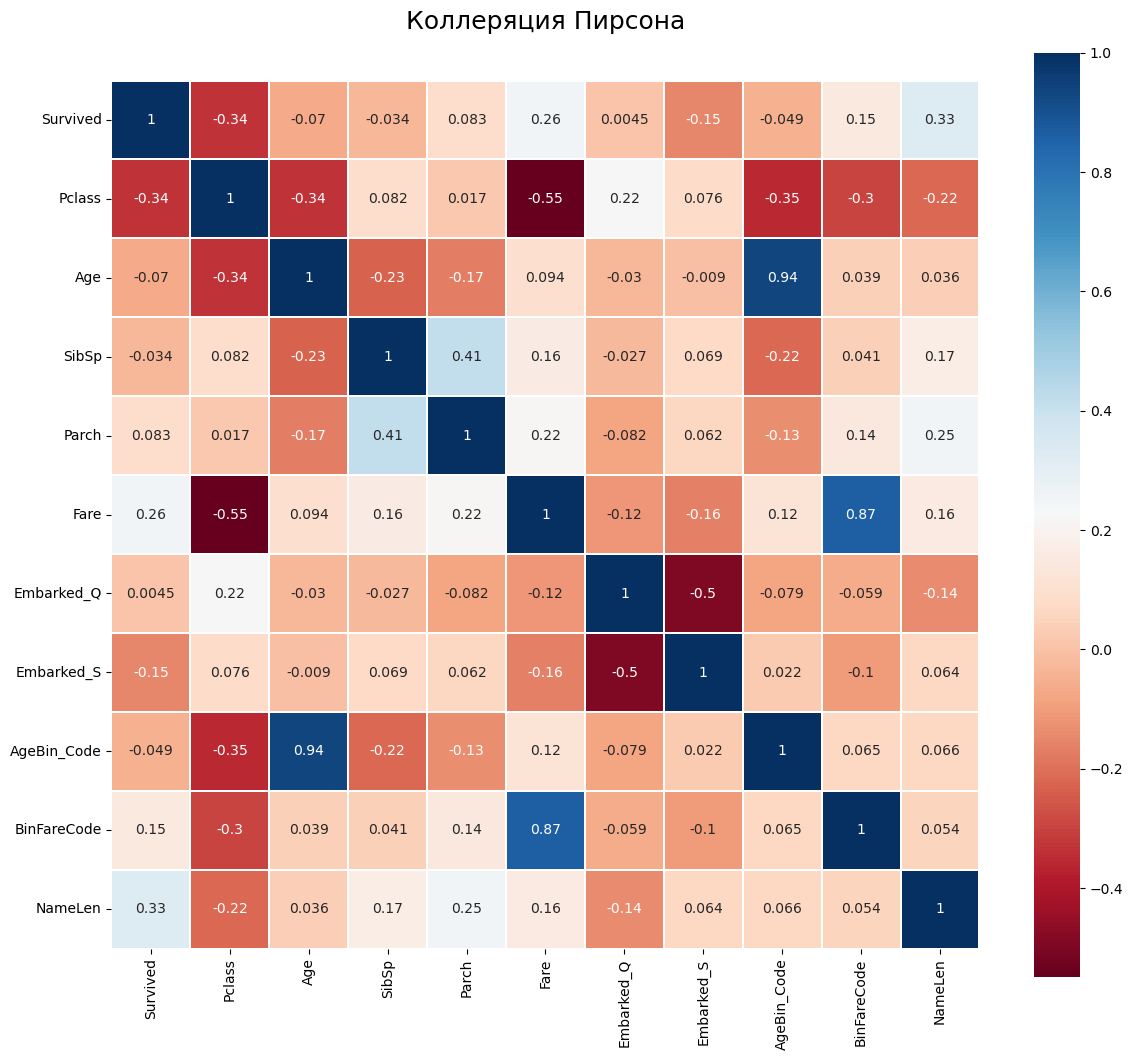

In [49]:
NumericData = Data._get_numeric_data()
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Коллеряция Пирсона', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 14*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

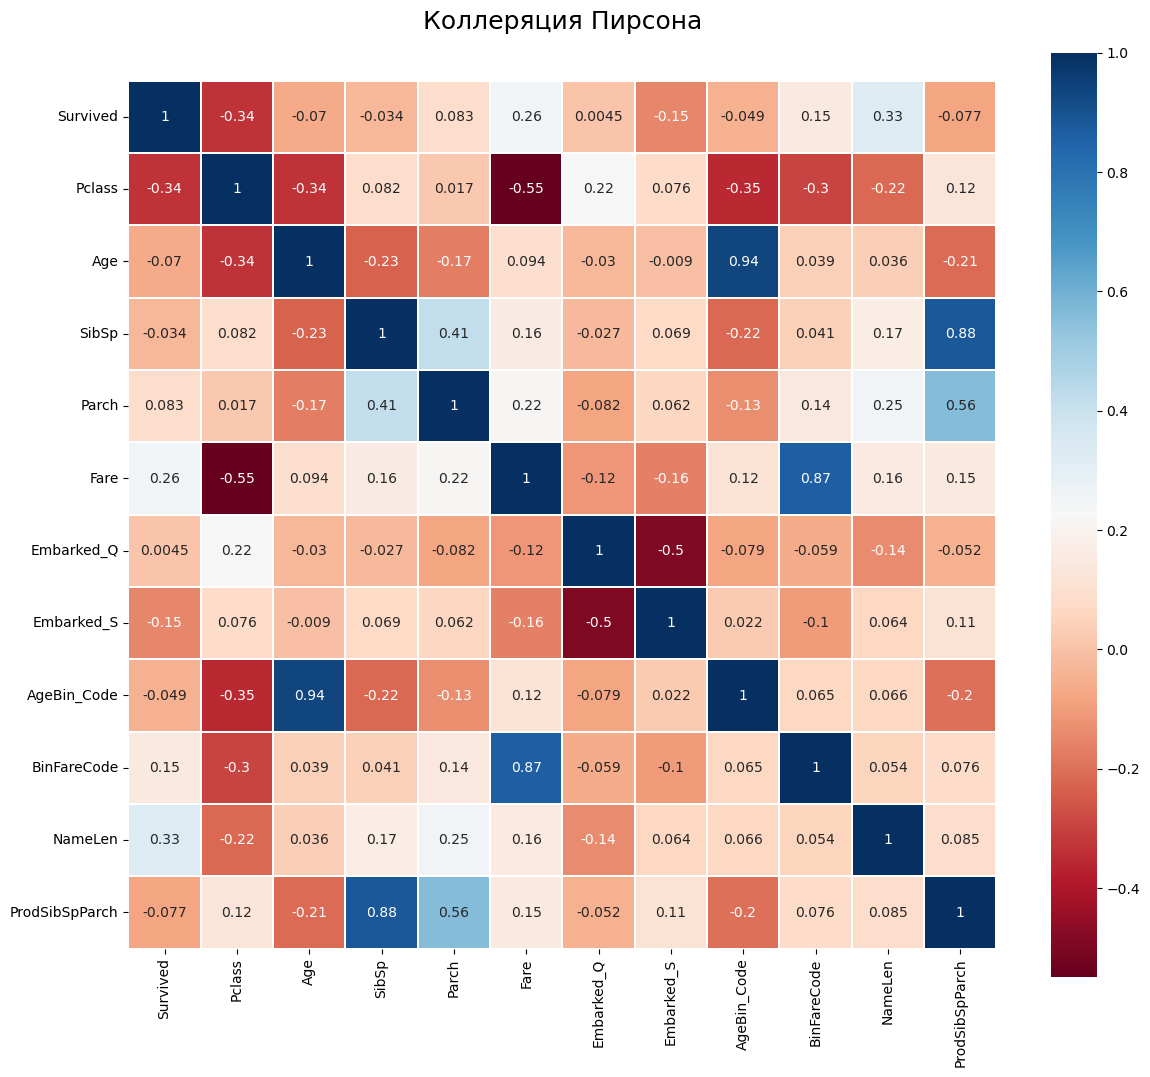

In [52]:
Data["ProdSibSpParch"] = Data.SibSp * Data.Parch
NumericData = Data._get_numeric_data()
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Коллеряция Пирсона', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

**Задание 15.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

## sklearn

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = Data['Fare']
X = Data._get_numeric_data().drop(["Fare", "Pclass"], axis=1)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)
X_train.shape

(622, 10)

In [64]:
X_test.shape

(267, 10)

In [65]:
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)

array([  8.41595172,   9.98586849,  59.3717331 ,  29.91260004,
        11.28992429,   8.94693545,  10.41566298,  22.89914183,
        40.64729241,  34.28885177,  26.81849182,  11.37574368,
        20.32200062,   9.91015093,  11.76369509,  47.44529325,
         4.32580271,  29.1582155 ,  11.00385964, 168.67496301,
        26.59031452,   7.79914859,  16.07259398,  25.76520104,
        22.97567035,  25.33959541,  25.36820188,  37.41631421,
         9.5127952 ,  28.58196068,  23.03221044,  43.60565229,
        14.38755384,  17.66342382,  24.12516813,   4.35440918,
         6.6674291 ,  26.61085588,  29.46742802,   9.28394348,
        27.59995306,  47.85893625,  28.6719056 ,  48.3600031 ,
        23.79131805,  23.39709709,  25.26668544,  28.82959839,
        31.25840662,  22.80403156,  17.12617053,  25.90058629,
         7.23328885,  14.66734894,  51.79018934,  51.61765679,
        33.99566086,   7.40492763, 183.58718864,  35.47287122,
        38.98561808, 185.50517665,  31.78498346,  46.89

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print('MSE: ', mean_squared_error(y_train, model.predict(X_train)))
print('MAE: ', mean_absolute_error(y_train, model.predict(X_train)))
print('R2: ', r2_score(y_train, model.predict(X_train)))

MSE:  449.96136848893843
MAE:  14.3621697225135
R2:  0.841900299953731


In [68]:
print('MSE: ', mean_squared_error(y_test, model.predict(X_test)))
print('MAE: ', mean_absolute_error(y_test, model.predict(X_test)))
print('R2: ', r2_score(y_test, model.predict(X_test)))

MSE:  465.080389710523
MAE:  14.65076704649352
R2:  0.7057943669346375
